In [1]:
# Load the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

In [2]:
# Load the data. 
# Datos del GPS Históricos

GPS_original = pd.read_excel('C:/Users/ferbm/Desktop/Rayados/Datos Rayados/Datos Históricos CFM.xlsx')

In [3]:
GPS_original.info()
GPS_original.describe()
print(GPS_original.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13510 entries, 0 to 13509
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Player             13510 non-null  object        
 1   Número             0 non-null      float64       
 2   Date               13510 non-null  datetime64[ns]
 3   MD                 13349 non-null  object        
 4    Duration          13500 non-null  object        
 5   Distance(m)        13510 non-null  float64       
 6   Dist (m/min)       13313 non-null  float64       
 7   HMLD (m)           13510 non-null  float64       
 8   % ALTA INTENSIDAD  13486 non-null  float64       
 9   Distance Acc(m)    13510 non-null  float64       
 10  Distance Dec(m)    13510 non-null  float64       
 11  HSR Abs Dist (m)   13510 non-null  float64       
 12  HSR Abs (m/min)    13463 non-null  float64       
 13  Sprint Abs(m)      13499 non-null  float64       
 14  Sprint

# Data Cleaning

In [4]:
GPS = GPS_original.copy()
GPS = GPS.drop(['Número'], axis=1)
GPS.head()

,Player,Date,MD,Duration,Distance(m),Dist (m/min),HMLD (m),% ALTA INTENSIDAD,Distance Acc(m),Distance Dec(m),...,HSR Abs (m/min),Sprint Abs(m),Sprints ABS,MAX Speed(km/h),Step Balance(%),Player Load,Power met,MAX HR(bpm),AVG HR(bpm),RPE General
0,Aviles Hurtado,2019-01-01,MD +2,00:31:19,2749.65,87.80,403.168,0.146625,78.50,93.37,...,3.89,23.72,3.0,27.19,-0.01,33.003,7867.353,NaN,NaN,5.0
1,Carlos Rodriguez,2019-01-01,MD +2,00:31:19,3313.08,105.79,559.754,0.168953,47.54,55.60,...,0.46,0.00,0.0,22.85,0.00,49.704,9098.766,NaN,NaN,4.0
2,Celso Ortiz,2019-01-01,MD +2,00:31:19,3014.92,96.27,550.662,0.182646,91.83,64.93,...,3.89,6.74,1.0,26.76,-0.05,45.443,8605.906,NaN,NaN,5.0
3,Cesar Montes,2019-01-01,MD +2,00:31:19,2843.11,90.78,283.517,0.099721,58.70,41.88,...,0.44,0.00,0.0,22.03,0.01,42.092,7895.185,NaN,NaN,5.0
4,Maximiliano Meza,2019-01-01,MD +2,00:31:19,2763.32,88.23,478.054,0.173000,158.08,90.30,...,2.45,23.59,2.0,27.20,0.02,36.856,7958.224,NaN,NaN,6.0


In [5]:
GPS['Date']=pd.to_datetime(GPS['Date'])
GPS['Date'].describe()

<ipython-input-5-7d23afd15a51>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  GPS['Date'].describe()


count                   13510
unique                    740
top       2020-12-20 00:00:00
freq                       53
first     2019-01-01 00:00:00
last      2021-11-11 00:00:00
Name: Date, dtype: object

In [6]:
# Dates of concern (July2021-Nov2021)
GPS = GPS[GPS['Date'] >= '2021-07-1']
GPS

,Player,Date,MD,Duration,Distance(m),Dist (m/min),HMLD (m),% ALTA INTENSIDAD,Distance Acc(m),Distance Dec(m),...,HSR Abs (m/min),Sprint Abs(m),Sprints ABS,MAX Speed(km/h),Step Balance(%),Player Load,Power met,MAX HR(bpm),AVG HR(bpm),RPE General
11781,Matías Kranevitter,2021-07-01,MD +1,00:45:50,2827.727,61.690000,344.839,0.121949,123.350,0.270,...,4.070,0.00,0.0,23.43,-0.0010,38.933,7971.952,NaN,NaN,NaN
11782,Maximiliano Meza,2021-07-01,MD +1,00:45:50,2958.854,64.560000,334.095,0.112914,153.600,2.850,...,5.384,0.00,0.0,23.59,0.0050,34.493,8228.918,NaN,NaN,NaN
11783,Alfonso Gonzalez,2021-07-01,MD +1,00:45:50,2853.192,62.250000,365.031,0.127938,128.510,0.000,...,3.374,0.00,0.0,22.69,0.0080,43.843,8079.838,NaN,NaN,NaN
11784,Celso Ortiz,2021-07-01,MD +1,00:45:50,2904.461,63.370000,340.377,0.117191,139.070,0.530,...,3.633,0.00,0.0,23.13,-0.0070,41.378,8135.715,NaN,NaN,NaN
11785,Sergio Villarreal,2021-07-01,MD +1,00:45:50,2945.042,64.250000,388.037,0.131759,109.470,6.060,...,3.817,0.00,0.0,22.83,-0.0200,37.994,8255.423,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13505,Gustavo Sanchez,2021-11-11,MD -3,00:58:06,4139.200,71.365517,571.458,0.138060,230.610,147.236,...,10.000,65.28,5.0,28.48,-0.0267,52.068,10912.119,NaN,NaN,NaN
13506,Vincent Janssen,2021-11-11,MD -3,00:58:06,3961.800,68.306897,537.296,0.135619,240.024,216.661,...,11.000,75.03,5.0,28.14,0.0103,48.529,10550.564,NaN,NaN,NaN
13507,Matías Kranevitter,2021-11-11,MD -3,00:58:06,4055.600,69.924138,641.275,0.158121,245.360,190.291,...,9.000,60.30,4.0,26.99,-0.0034,59.572,11024.576,NaN,NaN,NaN
13508,Maximiliano Meza,2021-11-11,MD -3,00:58:06,4098.900,70.670690,670.444,0.163567,252.871,212.053,...,13.000,119.03,7.0,27.57,-0.0039,50.056,11018.986,NaN,NaN,NaN


In [7]:
# Useful info from dates of concern (Dic2019-Nov2021)
GPS.info()
GPS.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 11781 to 13509
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Player             1729 non-null   object        
 1   Date               1729 non-null   datetime64[ns]
 2   MD                 1686 non-null   object        
 3    Duration          1728 non-null   object        
 4   Distance(m)        1729 non-null   float64       
 5   Dist (m/min)       1532 non-null   float64       
 6   HMLD (m)           1729 non-null   float64       
 7   % ALTA INTENSIDAD  1708 non-null   float64       
 8   Distance Acc(m)    1729 non-null   float64       
 9   Distance Dec(m)    1729 non-null   float64       
 10  HSR Abs Dist (m)   1729 non-null   float64       
 11  HSR Abs (m/min)    1700 non-null   float64       
 12  Sprint Abs(m)      1728 non-null   float64       
 13  Sprints ABS        1728 non-null   float64       
 14  MAX

,count,mean,std,min,25%,50%,75%,max
Distance(m),1729.0,4095.966390,2294.419504,416.9000,2760.800000,3535.100000,4499.100000,12478.000000
Dist (m/min),1532.0,72.643091,22.271184,19.9100,58.168545,68.635711,84.705662,202.063636
HMLD (m),1729.0,575.715521,461.481280,0.0000,266.046000,458.286000,727.343000,2754.064000
% ALTA INTENSIDAD,1708.0,0.126611,0.052663,0.0000,0.090835,0.131270,0.163033,0.353886
Distance Acc(m),1729.0,670.449880,4979.364288,0.0000,74.950000,134.950000,221.504000,69280.000000
Distance Dec(m),1729.0,645.268898,4930.576880,0.0000,54.286000,111.220000,178.130000,76611.000000
HSR Abs Dist (m),1729.0,131.111448,162.983111,0.0000,14.210000,71.960000,182.919000,1044.230000
HSR Abs (m/min),1700.0,9.006851,23.124302,0.0000,0.333000,3.000000,9.000000,523.740000
Sprint Abs(m),1728.0,48.566945,75.696445,0.0000,0.000000,16.690000,63.785000,617.620000
Sprints ABS,1728.0,3.114919,7.560864,0.0000,0.000000,1.000000,4.000000,127.980000


In [8]:
## new data frame with split value columns from MD
matchday = GPS['MD'].str.split(" ", n =2, expand = True)
#display(matchday[0:10])

## Make separate columns in the data frame from matchday data frame
GPS['match_day'] = matchday[1]

## Drop old column (i.e., MATCHUP) 
GPS.drop(columns = ['MD'], inplace = True)

## MD muy inconsistente mejor dropearla

In [9]:
# new data frame with split value columns from duration
training_duration = GPS[' Duration'].str.split(":", n =2, expand = True)

display(training_duration)

,0,1,2
11781,00,45,50
11782,00,45,50
11783,00,45,50
11784,00,45,50
11785,00,45,50
...,...,...,...
13505,00,58,06
13506,00,58,06
13507,00,58,06
13508,00,58,06


In [10]:
training_duration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 11781 to 13509
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1720 non-null   object
 1   1       1720 non-null   object
 2   2       1720 non-null   object
dtypes: object(3)
memory usage: 54.0+ KB


In [11]:
training_duration = training_duration.fillna(0)
training_duration = training_duration.astype(int)
#training_duration = training_duration.replace('-2000', np.nan)
training_duration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 11781 to 13509
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1729 non-null   int32
 1   1       1729 non-null   int32
 2   2       1729 non-null   int32
dtypes: int32(3)
memory usage: 33.8 KB


En algunas fechas la duración se registra añadiendo un a.m. y eso ocasiona que más adelante la conversión a segundos se de erroneamente!!!

In [12]:
# Make separate columns in the data frame from training_duration data frame
GPS['duration'] = training_duration[0]*60*60 + training_duration[1]*60 + training_duration[2]

# Drop old column (i.e., Duration) 
GPS.drop(columns = [' Duration'], inplace = True)

In [13]:
display(GPS[0:10])

,Player,Date,Distance(m),Dist (m/min),HMLD (m),% ALTA INTENSIDAD,Distance Acc(m),Distance Dec(m),HSR Abs Dist (m),HSR Abs (m/min),...,Sprints ABS,MAX Speed(km/h),Step Balance(%),Player Load,Power met,MAX HR(bpm),AVG HR(bpm),RPE General,match_day,duration
11781,Matías Kranevitter,2021-07-01,2827.727,61.69,344.839,0.121949,123.35,0.27,186.541,4.070,...,0.0,23.43,-0.001,38.933,7971.952,NaN,NaN,NaN,+1,2750
11782,Maximiliano Meza,2021-07-01,2958.854,64.56,334.095,0.112914,153.60,2.85,246.748,5.384,...,0.0,23.59,0.005,34.493,8228.918,NaN,NaN,NaN,+1,2750
11783,Alfonso Gonzalez,2021-07-01,2853.192,62.25,365.031,0.127938,128.51,0.00,154.638,3.374,...,0.0,22.69,0.008,43.843,8079.838,NaN,NaN,NaN,+1,2750
11784,Celso Ortiz,2021-07-01,2904.461,63.37,340.377,0.117191,139.07,0.53,166.524,3.633,...,0.0,23.13,-0.007,41.378,8135.715,NaN,NaN,NaN,+1,2750
11785,Sergio Villarreal,2021-07-01,2945.042,64.25,388.037,0.131759,109.47,6.06,174.934,3.817,...,0.0,22.83,-0.020,37.994,8255.423,NaN,NaN,NaN,+1,2750
11786,Axel Grijalva,2021-07-01,2901.686,63.30,253.505,0.087365,103.44,3.76,89.509,1.953,...,1.0,24.23,0.001,44.047,7920.883,NaN,NaN,NaN,+1,2750
11787,Gustavo Sanchez,2021-07-01,2919.234,63.69,368.013,0.126065,124.07,6.95,182.919,3.991,...,0.0,22.90,-0.003,42.174,8304.097,NaN,NaN,NaN,+1,2750
11788,Angel Zapata,2021-07-01,2860.103,62.40,378.254,0.132252,118.17,4.78,275.534,6.012,...,0.0,23.67,-0.057,40.046,8078.817,NaN,NaN,NaN,+1,2750
11789,Jaziel Martínez,2021-07-01,2943.575,64.23,344.167,0.116921,167.56,3.08,143.357,3.128,...,0.0,22.16,-0.022,36.607,8237.033,NaN,NaN,NaN,+1,2750
11790,Hernan Pineda,2021-07-01,2877.907,62.79,323.958,0.112567,137.67,6.47,185.696,4.052,...,0.0,22.42,0.019,37.308,8044.418,NaN,NaN,NaN,+1,2750


In [14]:
#GPS = GPS.set_index('Player')
#GPS=GPS.set_index('Date', append=True)
#GPS.head()

In [15]:
#GPS.reset_index(level=['Player'], inplace=True)
#GPS

In [16]:
# function to get unique player names
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))

In [17]:
print("Players:")
unique(GPS['Player'])

GPS['Player'].nunique()

Players:
['Alan Montes' 'Alfonso Alvarado' 'Alfonso Gonzalez' 'Angel Zapata'
 'Axel Grijalva' 'Carlos Rodriguez' 'Celso Ortiz' 'Cesar Montes'
 'Cesar Pantoja' 'Daniel Guillén' 'Daniel Lajud' 'Daniel Parra'
 'Dorlan  Pabon' 'Duván Vergara' 'Edson Gutiérrez' 'Erick Aguirre'
 'Gustavo  Sanchez' 'Hernan Pineda' 'Héctor Moreno' 'Jacobo Reyes'
 'Javier Casillas' 'Jaziel Martínez' 'Jesus  Gallardo' 'Joel Campbell'
 'Josue Martínez' 'Juan Machado' 'Juan Vega' 'Kaleth Hernandez'
 'Luis López' 'Marco López' 'Matías Kranevitter' 'Maximiliano Meza'
 'Michell Rodríguez' 'Rogelio Funes Mori' 'Roman Trujillo'
 'Sebastian Vegas' 'Sergio Villarreal' 'Stefan  Medina' 'Victor López'
 'Vincent  Janssen']


40

In [18]:
GPS["Player"]=GPS["Player"].replace("Daniel Guillén","Daniel Guillen")
GPS["Player"]=GPS["Player"].replace("Michell  Rodríguez","Michell Rodriguez")
GPS["Player"]=GPS["Player"].replace("Stefan  Medina","Stefan Medina")

In [19]:
print("Players:")
unique(GPS['Player'])

GPS['Player'].nunique()

Players:
['Alan Montes' 'Alfonso Alvarado' 'Alfonso Gonzalez' 'Angel Zapata'
 'Axel Grijalva' 'Carlos Rodriguez' 'Celso Ortiz' 'Cesar Montes'
 'Cesar Pantoja' 'Daniel Guillen' 'Daniel Lajud' 'Daniel Parra'
 'Dorlan  Pabon' 'Duván Vergara' 'Edson Gutiérrez' 'Erick Aguirre'
 'Gustavo  Sanchez' 'Hernan Pineda' 'Héctor Moreno' 'Jacobo Reyes'
 'Javier Casillas' 'Jaziel Martínez' 'Jesus  Gallardo' 'Joel Campbell'
 'Josue Martínez' 'Juan Machado' 'Juan Vega' 'Kaleth Hernandez'
 'Luis López' 'Marco López' 'Matías Kranevitter' 'Maximiliano Meza'
 'Michell Rodríguez' 'Rogelio Funes Mori' 'Roman Trujillo'
 'Sebastian Vegas' 'Sergio Villarreal' 'Stefan Medina' 'Victor López'
 'Vincent  Janssen']


40

In [20]:
X_complete = pd.DataFrame(GPS.shape[0] - GPS.isnull().sum(), columns=['CompleteSamples'])
X_complete

,CompleteSamples
Player,1729
Date,1729
Distance(m),1729
Dist (m/min),1532
HMLD (m),1729
% ALTA INTENSIDAD,1708
Distance Acc(m),1729
Distance Dec(m),1729
HSR Abs Dist (m),1729
HSR Abs (m/min),1700


In [21]:
percent_missing = pd.DataFrame(GPS.isnull().sum()/GPS.shape[0]*100, columns=['Percent Missing']).round(2)
percent_missing

,Percent Missing
Player,0.00
Date,0.00
Distance(m),0.00
Dist (m/min),11.39
HMLD (m),0.00
% ALTA INTENSIDAD,1.21
Distance Acc(m),0.00
Distance Dec(m),0.00
HSR Abs Dist (m),0.00
HSR Abs (m/min),1.68


In [22]:
# Mucho % missing de estas variables, mejor drop them
GPS = GPS.drop(columns=['MAX HR(bpm)', 'AVG HR(bpm)', 'RPE General'])
GPS

,Player,Date,Distance(m),Dist (m/min),HMLD (m),% ALTA INTENSIDAD,Distance Acc(m),Distance Dec(m),HSR Abs Dist (m),HSR Abs (m/min),Sprint Abs(m),Sprints ABS,MAX Speed(km/h),Step Balance(%),Player Load,Power met,match_day,duration
11781,Matías Kranevitter,2021-07-01,2827.727,61.690000,344.839,0.121949,123.350,0.270,186.541,4.070,0.00,0.0,23.43,-0.0010,38.933,7971.952,+1,2750
11782,Maximiliano Meza,2021-07-01,2958.854,64.560000,334.095,0.112914,153.600,2.850,246.748,5.384,0.00,0.0,23.59,0.0050,34.493,8228.918,+1,2750
11783,Alfonso Gonzalez,2021-07-01,2853.192,62.250000,365.031,0.127938,128.510,0.000,154.638,3.374,0.00,0.0,22.69,0.0080,43.843,8079.838,+1,2750
11784,Celso Ortiz,2021-07-01,2904.461,63.370000,340.377,0.117191,139.070,0.530,166.524,3.633,0.00,0.0,23.13,-0.0070,41.378,8135.715,+1,2750
11785,Sergio Villarreal,2021-07-01,2945.042,64.250000,388.037,0.131759,109.470,6.060,174.934,3.817,0.00,0.0,22.83,-0.0200,37.994,8255.423,+1,2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13505,Gustavo Sanchez,2021-11-11,4139.200,71.365517,571.458,0.138060,230.610,147.236,154.810,10.000,65.28,5.0,28.48,-0.0267,52.068,10912.119,-3,3486
13506,Vincent Janssen,2021-11-11,3961.800,68.306897,537.296,0.135619,240.024,216.661,156.340,11.000,75.03,5.0,28.14,0.0103,48.529,10550.564,-3,3486
13507,Matías Kranevitter,2021-11-11,4055.600,69.924138,641.275,0.158121,245.360,190.291,145.290,9.000,60.30,4.0,26.99,-0.0034,59.572,11024.576,-3,3486
13508,Maximiliano Meza,2021-11-11,4098.900,70.670690,670.444,0.163567,252.871,212.053,216.050,13.000,119.03,7.0,27.57,-0.0039,50.056,11018.986,-3,3486


# Data Imputing

In [23]:
# Filling missing values with mean
GPS = GPS.fillna(GPS.mean(axis=0))
percent_missing = pd.DataFrame(GPS.isnull().sum()/GPS.shape[0]*100, columns=['Percent Missing']).round(2)
percent_missing

<ipython-input-23-8657bfaefa58>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  GPS = GPS.fillna(GPS.mean(axis=0))
<ipython-input-23-8657bfaefa58>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  GPS = GPS.fillna(GPS.mean(axis=0))


,Percent Missing
Player,0.00
Date,0.00
Distance(m),0.00
Dist (m/min),0.00
HMLD (m),0.00
% ALTA INTENSIDAD,0.00
Distance Acc(m),0.00
Distance Dec(m),0.00
HSR Abs Dist (m),0.00
HSR Abs (m/min),0.00


# Statistical Analysis for each feature
## Distance

In [24]:
GPS['Distance(m)'].describe()

count     1729.000000
mean      4095.966390
std       2294.419504
min        416.900000
25%       2760.800000
50%       3535.100000
75%       4499.100000
max      12478.000000
Name: Distance(m), dtype: float64

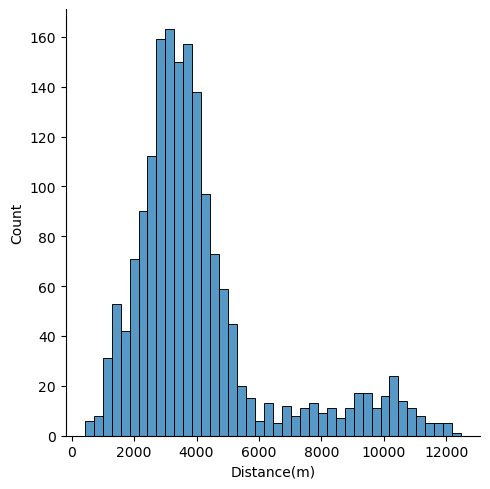

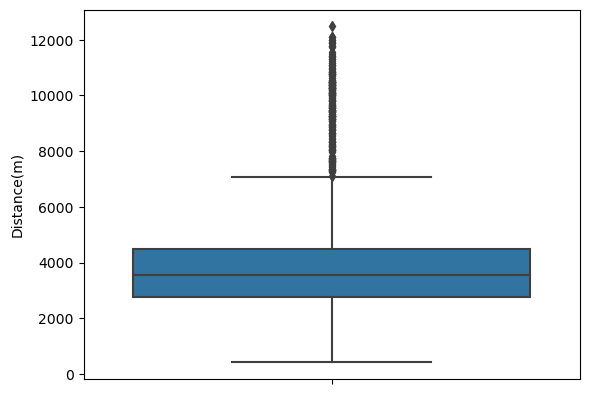

In [25]:
GPS['Distance(m)'].nunique()
sns.displot(GPS['Distance(m)'])
plt.show()
sns.boxplot(data=GPS,y='Distance(m)')
plt.show()

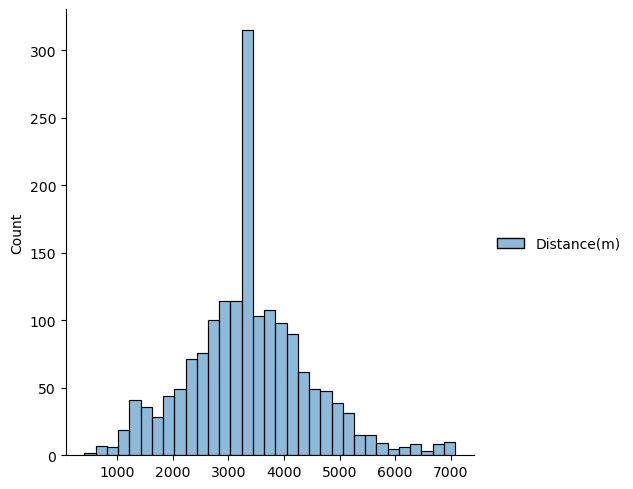

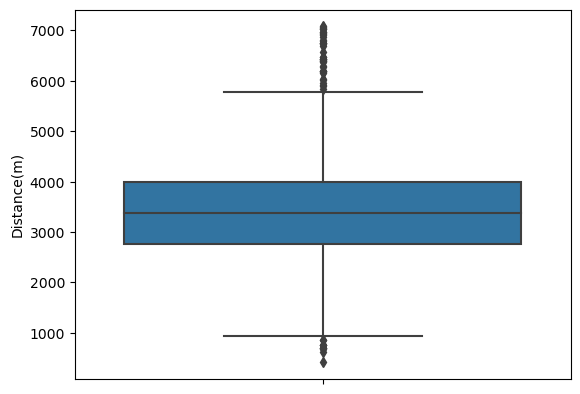

In [26]:
# OUTLIERS

missing_col = ['Distance(m)']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='Distance(m)')
plt.show()

## Dist (m/min)

In [27]:
GPS['Dist (m/min)'].describe()

count    1729.000000
mean       72.643091
std        20.963271
min        19.910000
25%        59.785185
50%        71.494444
75%        82.149057
max       202.063636
Name: Dist (m/min), dtype: float64

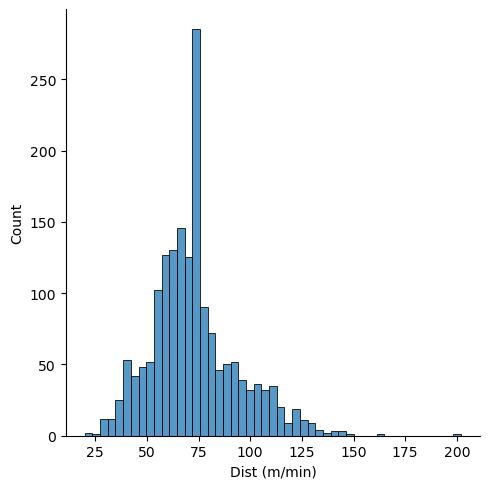

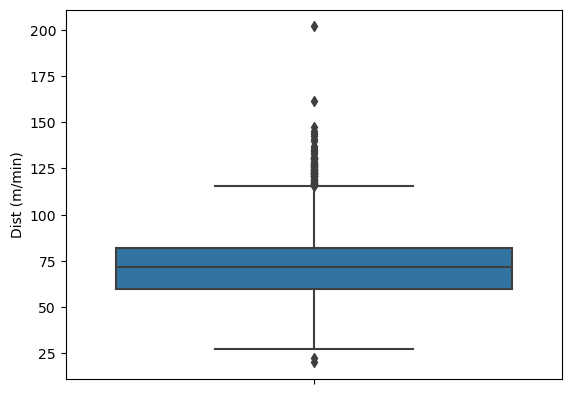

In [28]:
GPS['Dist (m/min)'].nunique()
sns.displot(GPS['Dist (m/min)'])
plt.show()
sns.boxplot(data=GPS,y='Dist (m/min)')
plt.show()

In [29]:
GPS.index[GPS['Dist (m/min)'] > 200].tolist()

[12772]

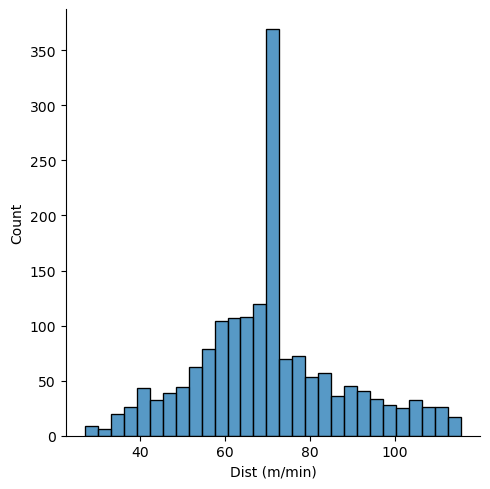

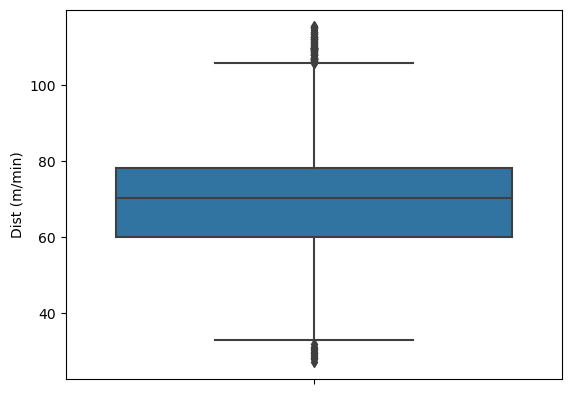

In [30]:
# OUTLIERS

missing_col = ['Dist (m/min)']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS['Dist (m/min)'].nunique()
sns.displot(GPS['Dist (m/min)'])
plt.show()
sns.boxplot(data=GPS,y='Dist (m/min)')
plt.show()

## HMLD

In [31]:
GPS['HMLD (m)'].describe()

count    1729.000000
mean      575.715521
std       461.481280
min         0.000000
25%       266.046000
50%       458.286000
75%       727.343000
max      2754.064000
Name: HMLD (m), dtype: float64

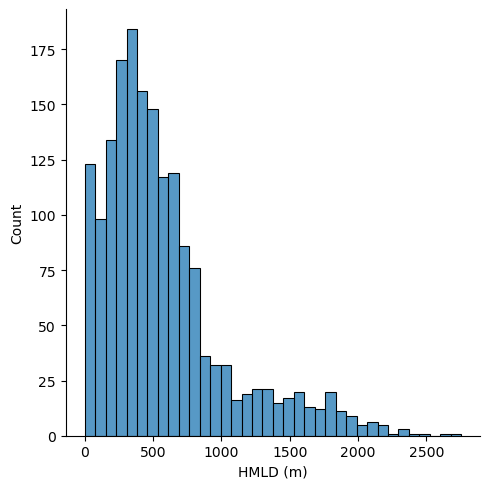

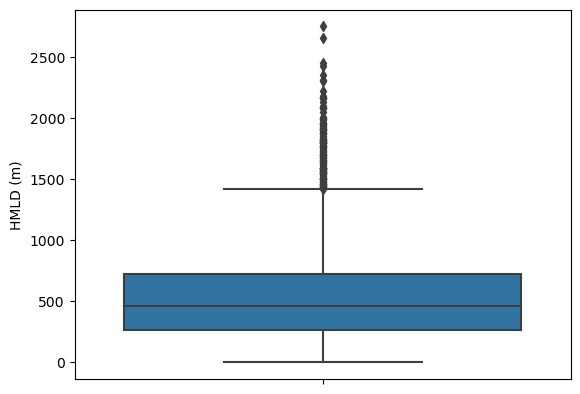

In [32]:
GPS['HMLD (m)'].nunique()
sns.displot(GPS['HMLD (m)'])
plt.show()
sns.boxplot(data=GPS,y='HMLD (m)')
plt.show()

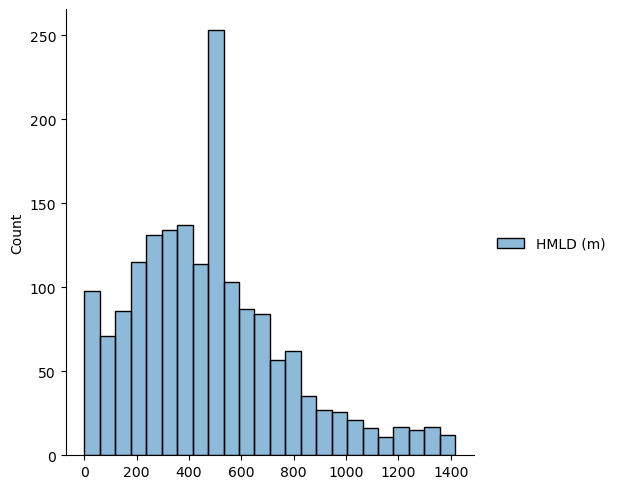

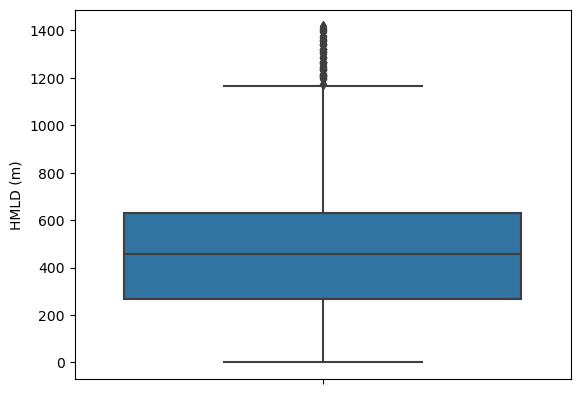

In [33]:
# OUTLIERS

missing_col = ['HMLD (m)']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='HMLD (m)')
plt.show()

## HSR Abs Dist (m)

In [34]:
GPS['HSR Abs Dist (m)'].describe()

count    1729.000000
mean      131.111448
std       162.983111
min         0.000000
25%        14.210000
50%        71.960000
75%       182.919000
max      1044.230000
Name: HSR Abs Dist (m), dtype: float64

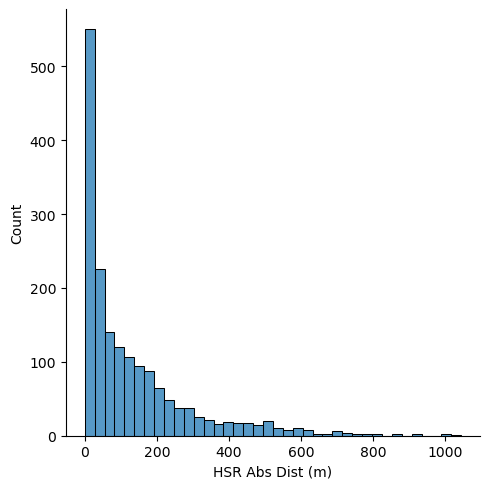

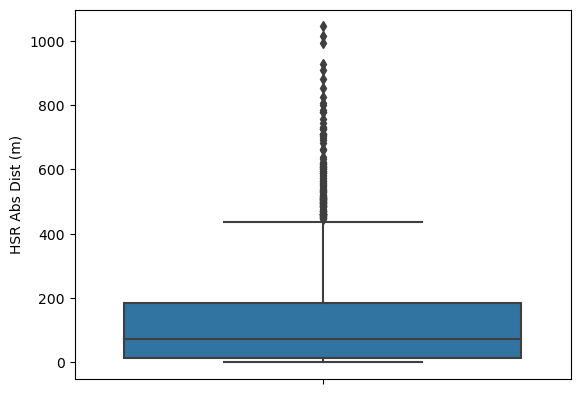

In [35]:
GPS['HSR Abs Dist (m)'].nunique()
sns.displot(GPS['HSR Abs Dist (m)'])
plt.show()
sns.boxplot(data=GPS,y='HSR Abs Dist (m)')
plt.show()

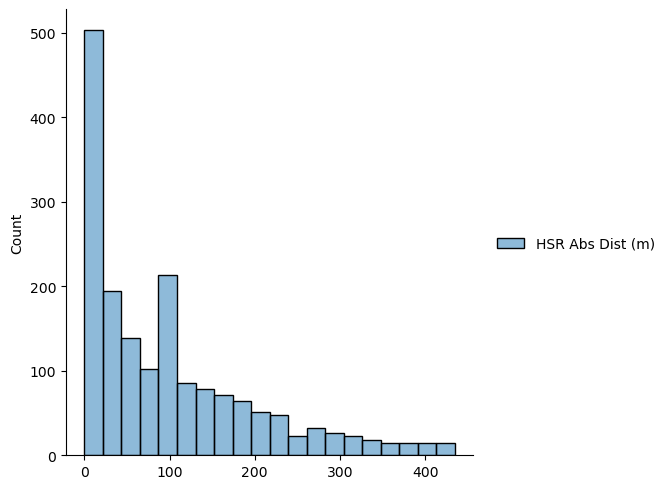

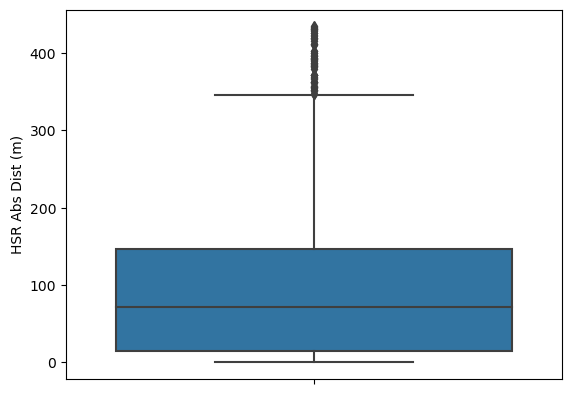

In [36]:
# OUTLIERS

missing_col = ['HSR Abs Dist (m)']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='HSR Abs Dist (m)')
plt.show()

## HSR Abs (m/min) 

In [37]:
GPS['HSR Abs (m/min)'].describe()

count    1729.000000
mean        9.006851
std        22.929440
min         0.000000
25%         0.490000
50%         3.000000
75%         9.000000
max       523.740000
Name: HSR Abs (m/min), dtype: float64

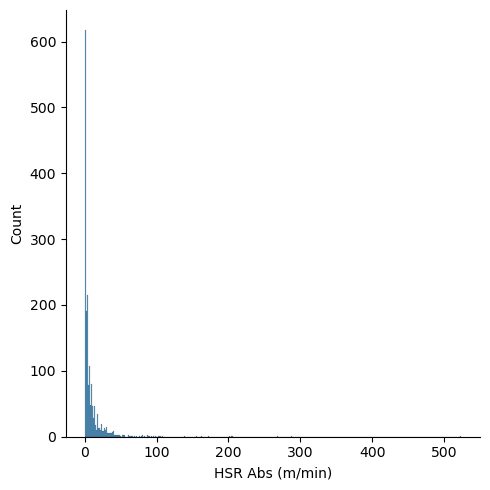

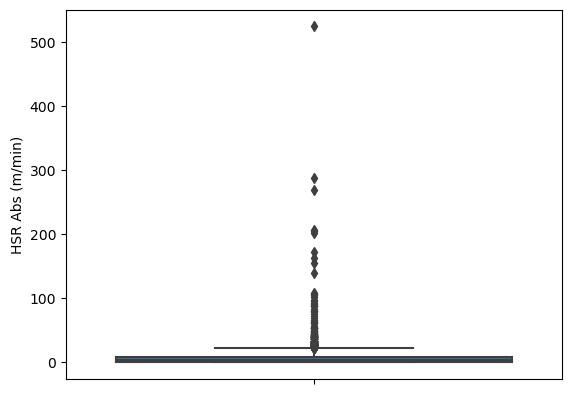

In [38]:
GPS['HSR Abs (m/min)'].nunique()
sns.displot(GPS['HSR Abs (m/min)'])
plt.show()
sns.boxplot(data=GPS,y='HSR Abs (m/min)')
plt.show()

In [39]:
GPS.index[GPS['HSR Abs (m/min)'] > 100].tolist()

[11853,
 11863,
 11866,
 11872,
 12036,
 12037,
 12044,
 12048,
 12049,
 12050,
 12052,
 12053,
 12354,
 12511]

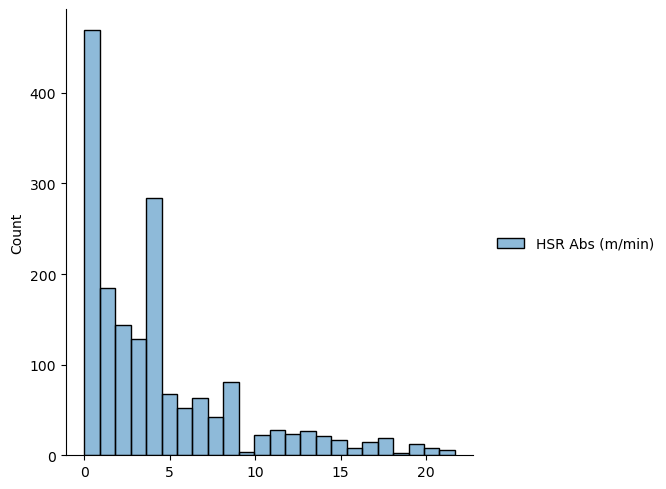

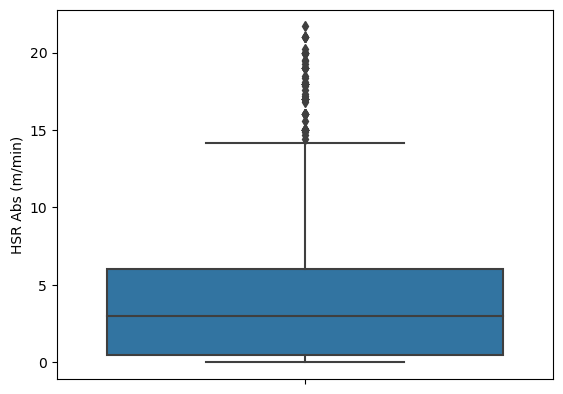

In [40]:
# OUTLIERS

missing_col = ['HSR Abs (m/min)']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='HSR Abs (m/min)')
plt.show()

## % Alta Intensidad

In [41]:
GPS['% ALTA INTENSIDAD'].describe()

count    1729.000000
mean        0.126611
std         0.052342
min         0.000000
25%         0.091914
50%         0.130359
75%         0.162654
max         0.353886
Name: % ALTA INTENSIDAD, dtype: float64

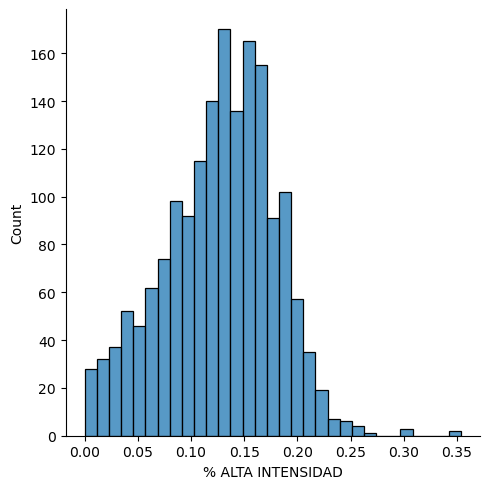

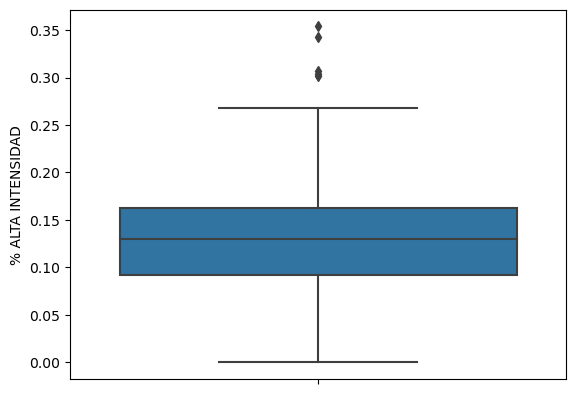

In [42]:
GPS['% ALTA INTENSIDAD'].nunique()
sns.displot(GPS['% ALTA INTENSIDAD'])
plt.show()
sns.boxplot(data=GPS,y='% ALTA INTENSIDAD')
plt.show()

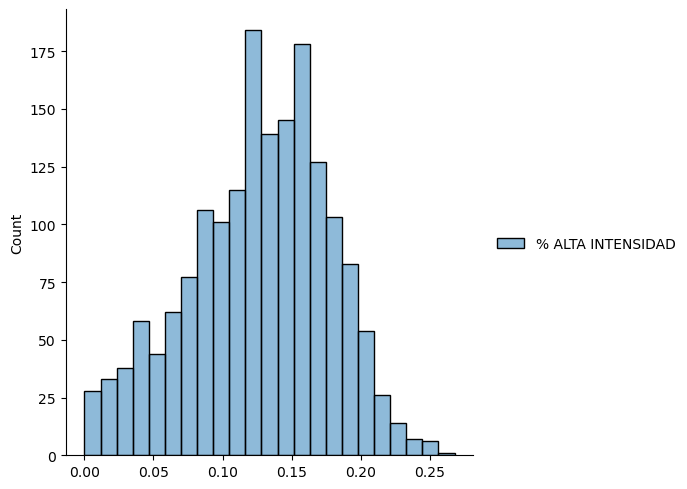

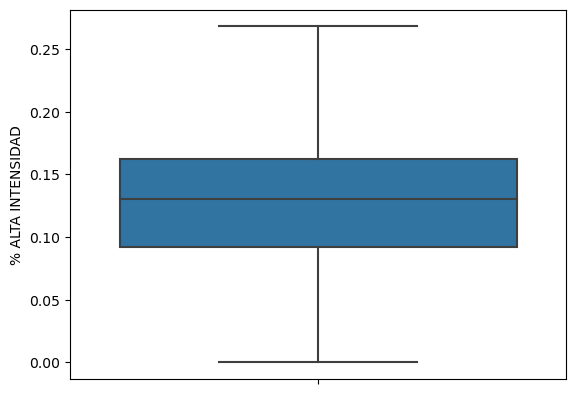

In [43]:
# OUTLIERS

missing_col = ['% ALTA INTENSIDAD']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='% ALTA INTENSIDAD')
plt.show()

## Distance Acc(m)

In [44]:
GPS['Distance Acc(m)'].describe()

count     1729.000000
mean       670.449880
std       4979.364288
min          0.000000
25%         74.950000
50%        134.950000
75%        221.504000
max      69280.000000
Name: Distance Acc(m), dtype: float64

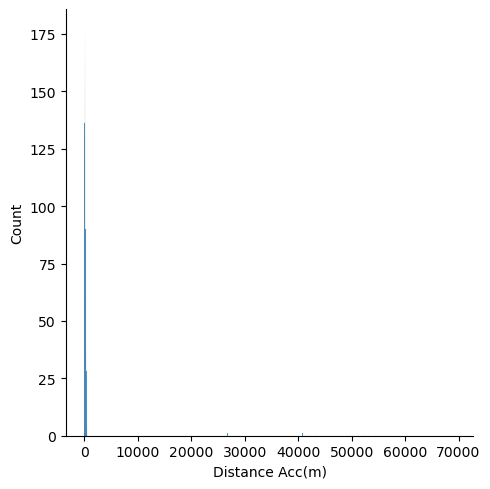

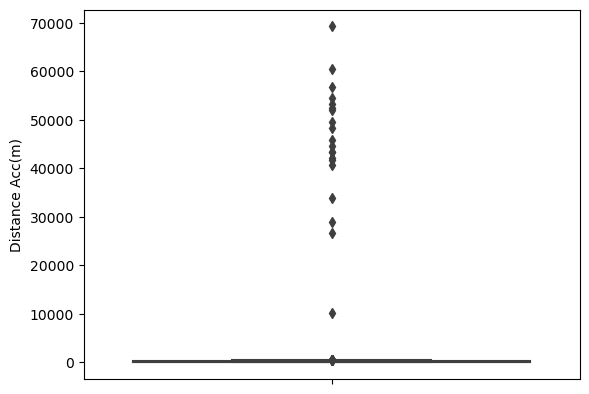

In [45]:
GPS['Distance Acc(m)'].nunique()
sns.displot(GPS['Distance Acc(m)'])
plt.show()
sns.boxplot(data=GPS,y='Distance Acc(m)')
plt.show()

In [46]:
GPS.index[GPS['Distance Acc(m)'] > 2000].tolist()

[12223,
 12224,
 12225,
 12226,
 12227,
 12228,
 12229,
 12230,
 12231,
 12232,
 12233,
 12234,
 12235,
 12236,
 12237,
 12238,
 12239,
 12240,
 12241,
 12242]

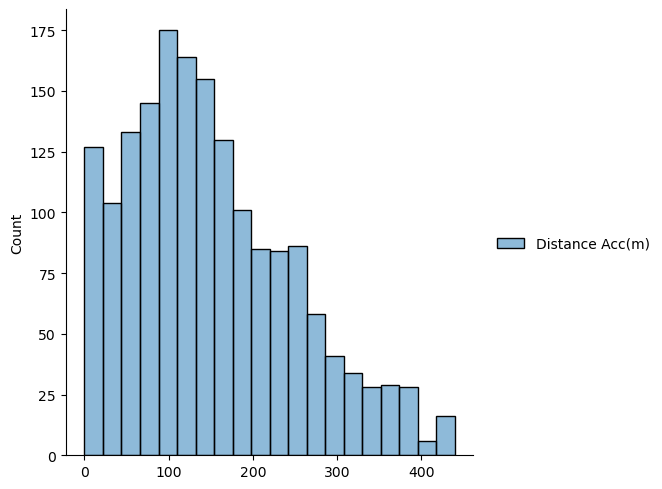

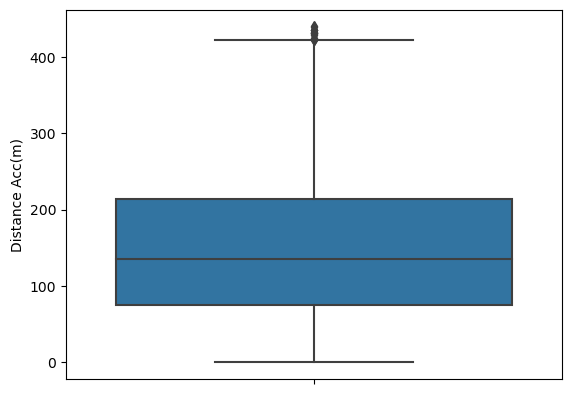

In [47]:
# OUTLIERS

missing_col = ['Distance Acc(m)']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='Distance Acc(m)')
plt.show()

## Distance Dec(m) 

In [48]:
GPS['Distance Dec(m)'].describe()

count     1729.000000
mean       645.268898
std       4930.576880
min          0.000000
25%         54.286000
50%        111.220000
75%        178.130000
max      76611.000000
Name: Distance Dec(m), dtype: float64

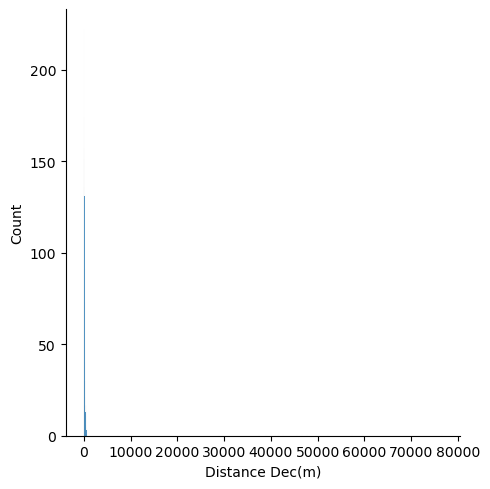

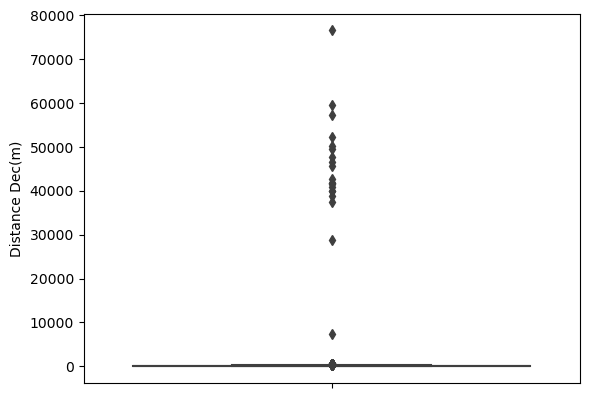

In [49]:
GPS['Distance Dec(m)'].nunique()
sns.displot(GPS['Distance Dec(m)'])
plt.show()
sns.boxplot(data=GPS,y='Distance Dec(m)')
plt.show()

In [50]:
GPS.index[GPS['Distance Dec(m)'] > 2000].tolist()

[12223,
 12224,
 12225,
 12226,
 12227,
 12228,
 12229,
 12230,
 12231,
 12232,
 12233,
 12234,
 12235,
 12236,
 12237,
 12238,
 12239,
 12240,
 12241,
 12242]

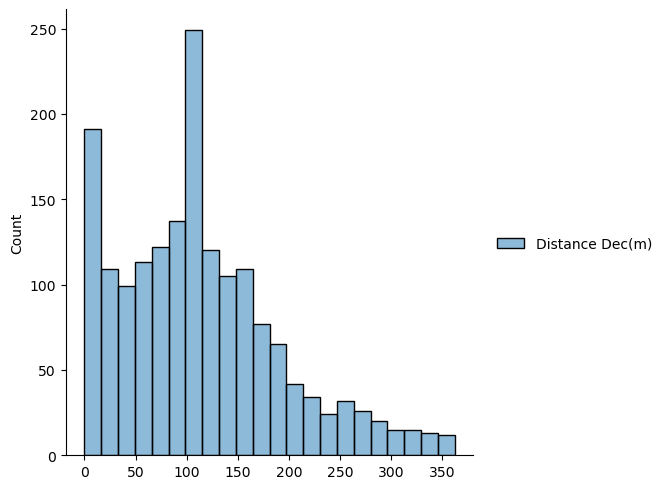

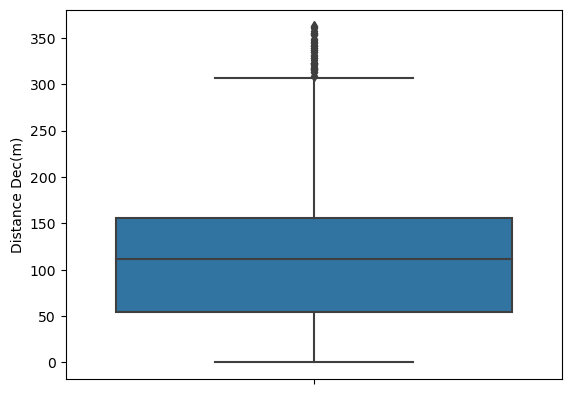

In [51]:
# OUTLIERS

missing_col = ['Distance Dec(m)']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='Distance Dec(m)')
plt.show()

## Sprint Abs(m)

In [52]:
GPS['Sprint Abs(m)'].describe()

count    1729.000000
mean       48.566945
std        75.674539
min         0.000000
25%         0.000000
50%        16.770000
75%        63.710000
max       617.620000
Name: Sprint Abs(m), dtype: float64

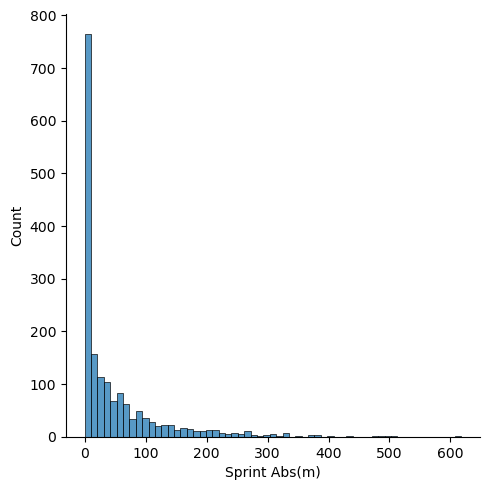

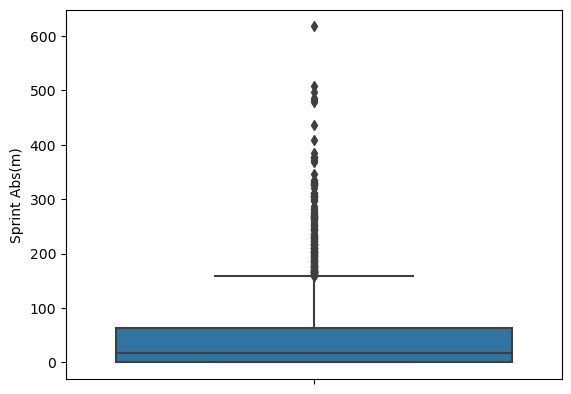

In [53]:
GPS['Sprint Abs(m)'].nunique()
sns.displot(GPS['Sprint Abs(m)'])
plt.show()
sns.boxplot(data=GPS,y='Sprint Abs(m)')
plt.show()

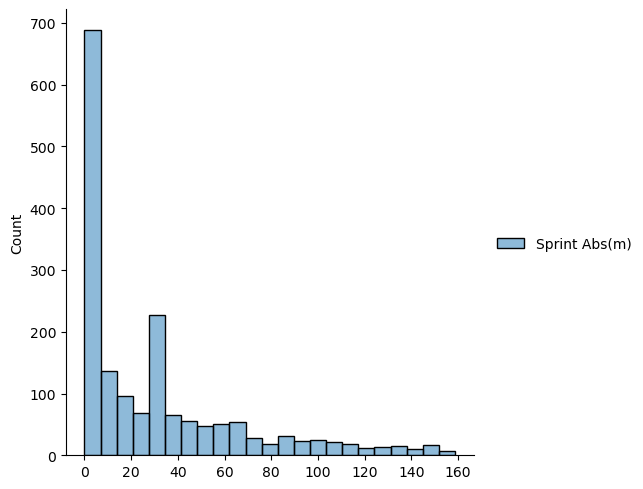

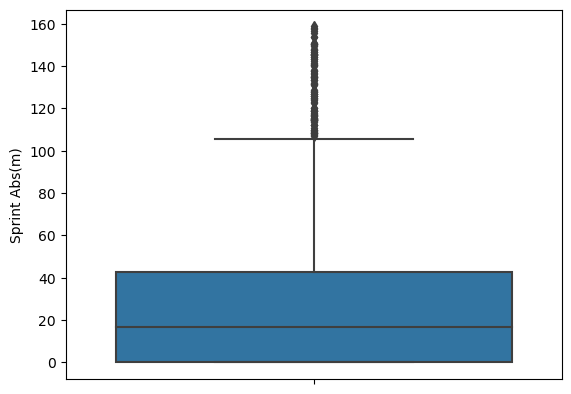

In [54]:
# OUTLIERS

missing_col = ['Sprint Abs(m)']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='Sprint Abs(m)')
plt.show()

## Sprints ABS

In [55]:
GPS['Sprints ABS'].describe()

count    1729.000000
mean        3.114919
std         7.558676
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       127.980000
Name: Sprints ABS, dtype: float64

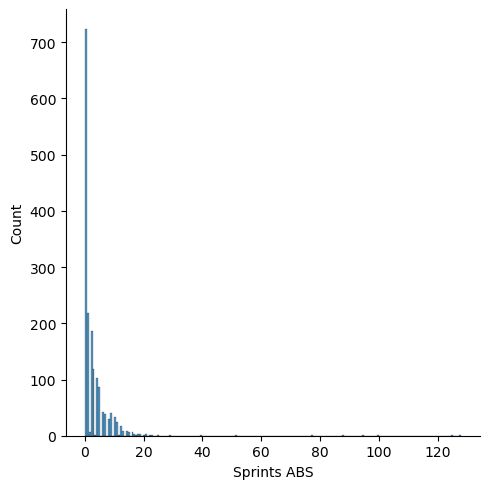

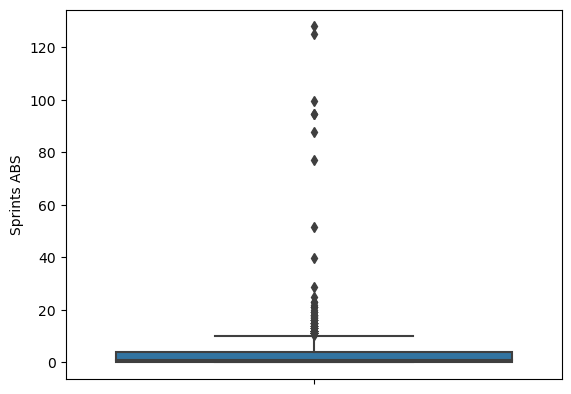

In [56]:
GPS['Sprints ABS'].nunique()
sns.displot(GPS['Sprints ABS'])
plt.show()
sns.boxplot(data=GPS,y='Sprints ABS')
plt.show()

In [57]:
Index = GPS['Sprints ABS'].idxmax()
print(Index)

12281


In [58]:
GPS.index[GPS['Sprints ABS'] > 20].tolist()

[12277,
 12278,
 12279,
 12280,
 12281,
 12282,
 12283,
 12284,
 12825,
 12939,
 12944,
 12946,
 13098,
 13104,
 13185,
 13349,
 13354]

### Nota: Hay algo mal en esta columna, se supone que mide el # de sprints. Hay valores demasiado altos (441 por ejemplo) 

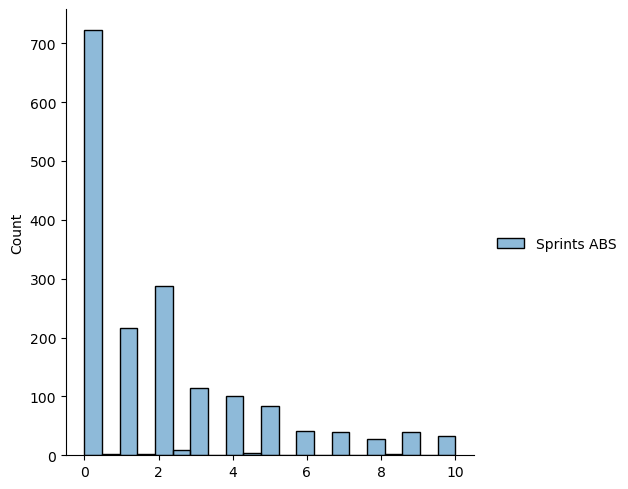

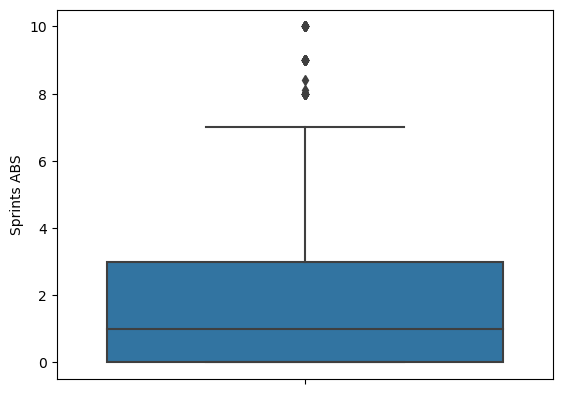

In [59]:
# OUTLIERS

missing_col = ['Sprints ABS']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='Sprints ABS')
plt.show()

## MAX Speed(km/h) 

In [60]:
GPS['MAX Speed(km/h)'].describe()

count    1729.000000
mean       24.780162
std         4.894585
min         0.000000
25%        22.370000
50%        25.380000
75%        27.930000
max        53.210000
Name: MAX Speed(km/h), dtype: float64

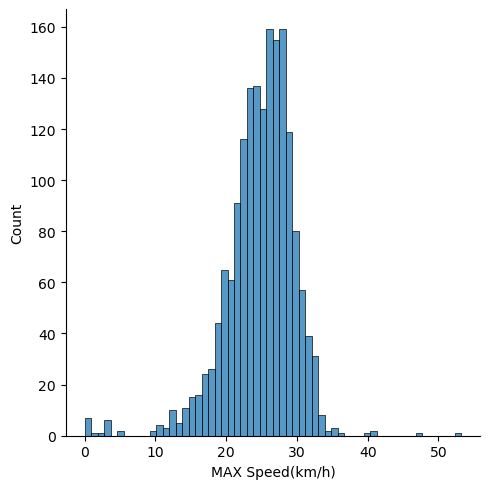

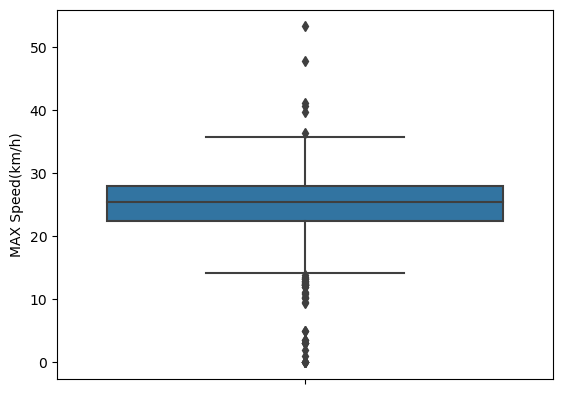

In [61]:
GPS['MAX Speed(km/h)'].nunique()
sns.displot(GPS['MAX Speed(km/h)'])
plt.show()
sns.boxplot(data=GPS,y='MAX Speed(km/h)')
plt.show()

###  In the World championship in Berlin, 2009 Usain Bolt sprinted at 44.72 km/h (27.8 mph), setting the record for human footspeed

In [62]:
GPS.index[GPS['Player Load '] > 45].tolist()

[11793,
 11796,
 11799,
 11803,
 11805,
 11806,
 11807,
 11808,
 11809,
 11810,
 11811,
 11812,
 11813,
 11814,
 11815,
 11816,
 11817,
 11818,
 11819,
 11820,
 11821,
 11822,
 11823,
 11824,
 11825,
 11826,
 11827,
 11828,
 11829,
 11830,
 11831,
 11833,
 11835,
 11837,
 11839,
 11841,
 11842,
 11843,
 11844,
 11845,
 11846,
 11847,
 11848,
 11849,
 11850,
 11851,
 11852,
 11853,
 11854,
 11855,
 11856,
 11857,
 11858,
 11859,
 11860,
 11861,
 11862,
 11863,
 11864,
 11865,
 11866,
 11867,
 11868,
 11869,
 11870,
 11871,
 11872,
 11873,
 11874,
 11875,
 11876,
 11877,
 11878,
 11879,
 11880,
 11881,
 11882,
 11883,
 11884,
 11885,
 11886,
 11887,
 11888,
 11889,
 11890,
 11891,
 11892,
 11893,
 11894,
 11895,
 11896,
 11897,
 11898,
 11899,
 11901,
 11902,
 11904,
 11905,
 11906,
 11907,
 11908,
 11909,
 11910,
 11911,
 11912,
 11913,
 11914,
 11915,
 11916,
 11917,
 11918,
 11919,
 11920,
 11922,
 11924,
 11928,
 11930,
 11933,
 11936,
 11937,
 11940,
 11941,
 11942,
 11943,
 11944,


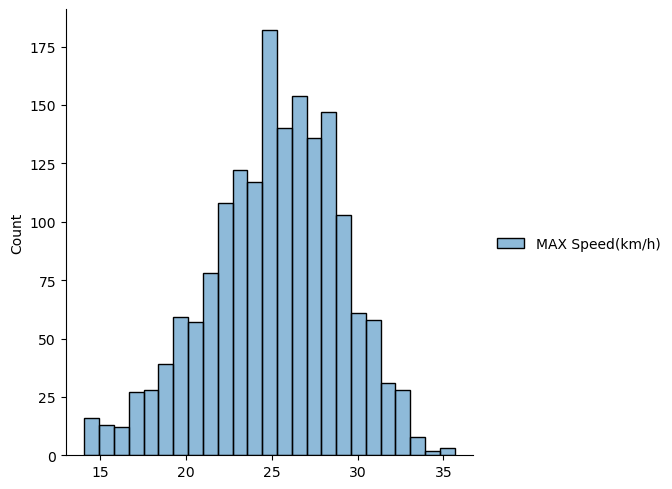

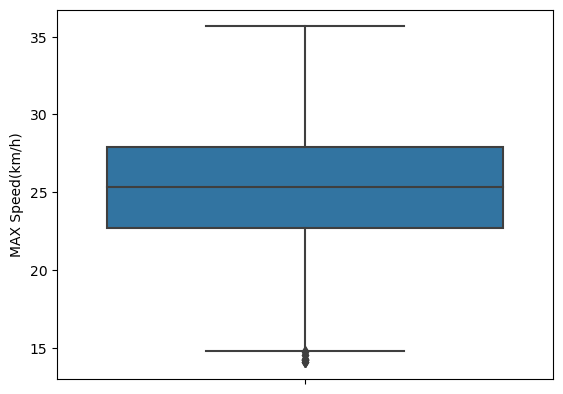

In [63]:
# OUTLIERS

missing_col = ['MAX Speed(km/h)']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='MAX Speed(km/h)')
plt.show()

## Step Balance(%) 

In [64]:
GPS['Step Balance(%)'].describe()

count    1729.000000
mean        0.021466
std         1.234114
min        -0.197500
25%        -0.022000
50%        -0.007800
75%         0.005800
max        51.299000
Name: Step Balance(%), dtype: float64

## Player Load

In [65]:
GPS['Player Load '].describe()

count    1729.000000
mean       65.522613
std       219.885437
min         5.406000
25%        38.465000
50%        50.671000
75%        67.573000
max      8789.811000
Name: Player Load , dtype: float64

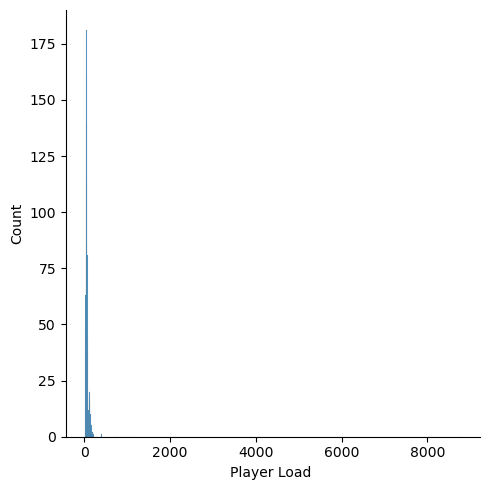

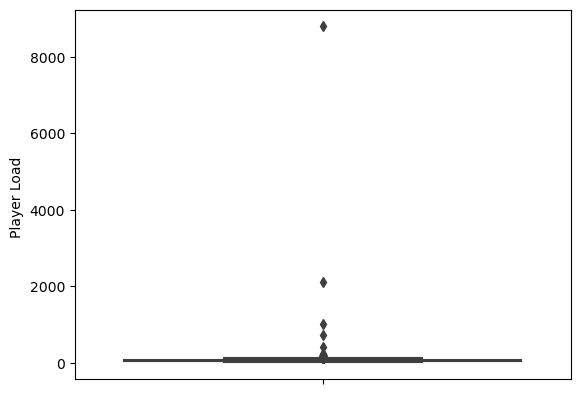

In [66]:
GPS['Player Load '].nunique()
sns.displot(GPS['Player Load '])
plt.show()
sns.boxplot(data=GPS,y='Player Load ')
plt.show()

In [67]:
GPS.index[GPS['Player Load '] > 300].tolist()

[11799, 12029, 12044, 12069, 12993]

### Nota: También hay algo raro con esta variable, investigar valores 'normales'

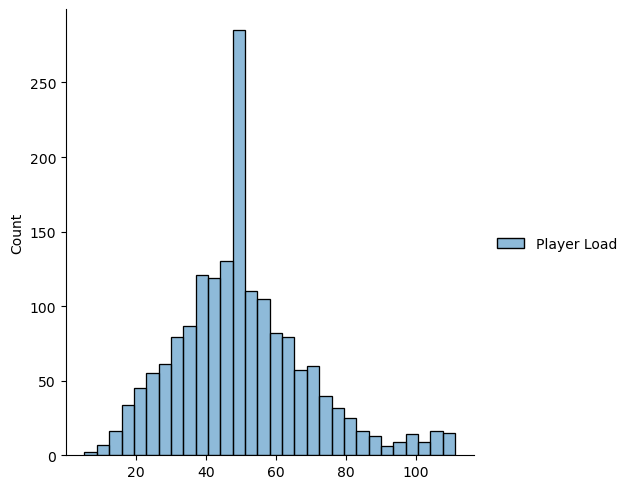

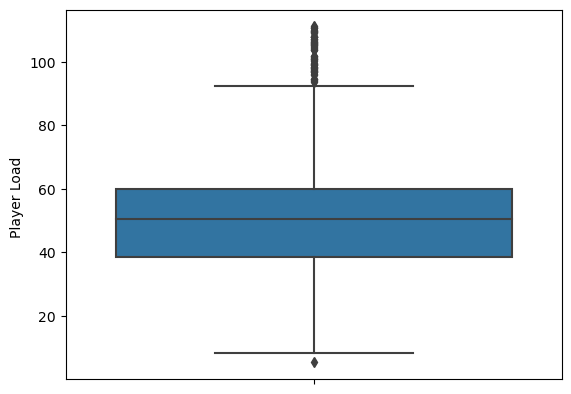

In [68]:
# OUTLIERS

missing_col = ['Player Load ']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='Player Load ')
plt.show()

## Power Met

In [69]:
GPS['Power met'].describe()

count     1729.000000
mean     10487.743859
std       5784.108217
min          7.751000
25%       6980.103000
50%       9075.450000
75%      12195.402000
max      31882.188000
Name: Power met, dtype: float64

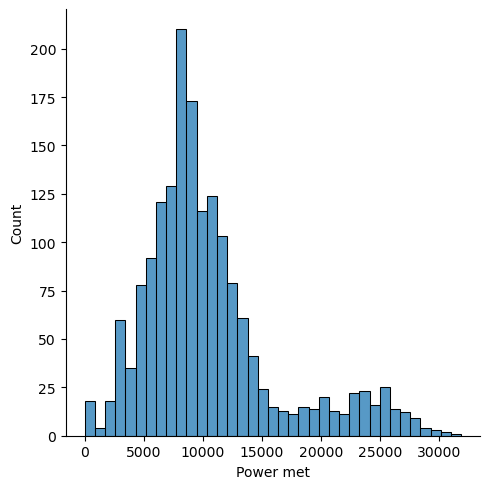

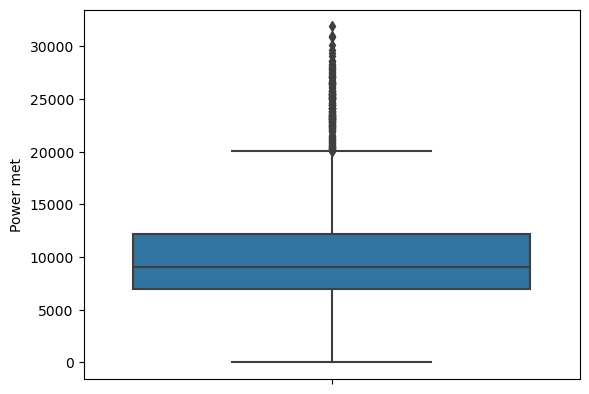

In [70]:
GPS['Power met'].nunique()
sns.displot(GPS['Power met'])
plt.show()
sns.boxplot(data=GPS,y='Power met')
plt.show()

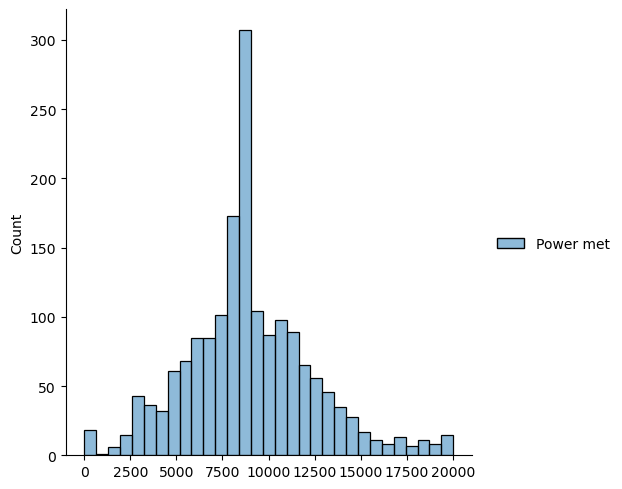

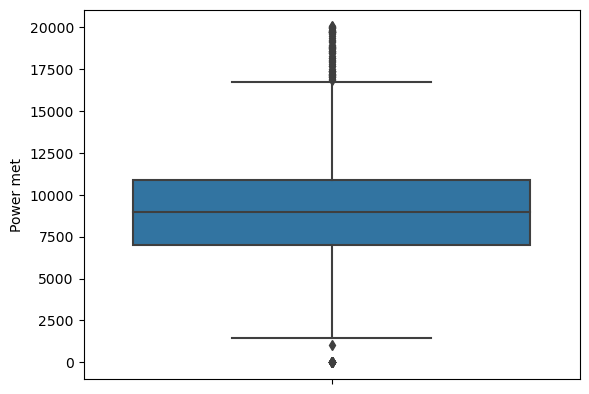

In [71]:
# OUTLIERS

missing_col = ['Power met']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='Power met')
plt.show()

## match_day

In [72]:
GPS['match_day'].describe()

count     1358
unique       8
top         -1
freq       416
Name: match_day, dtype: object

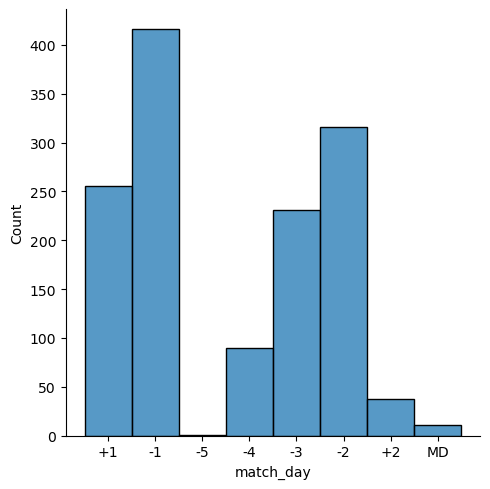

In [73]:
GPS['match_day'].nunique()
sns.displot(GPS['match_day'])
plt.show()
#sns.boxplot(data=GPS,y='match_day')
#plt.show()

## duration 

In [74]:
GPS['duration'].describe()

count    1729.000000
mean     3332.954887
std      1198.051961
min         0.000000
25%      2633.000000
50%      3314.000000
75%      3958.000000
max      6738.000000
Name: duration, dtype: float64

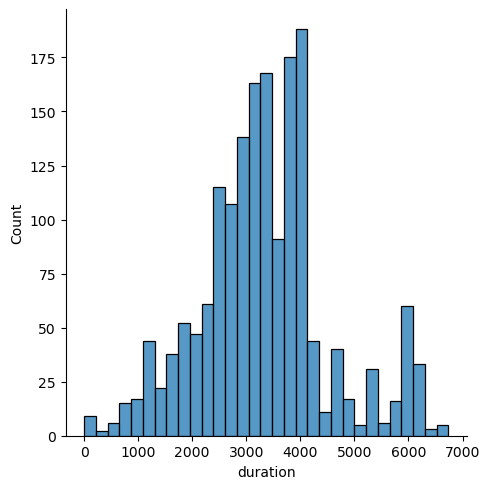

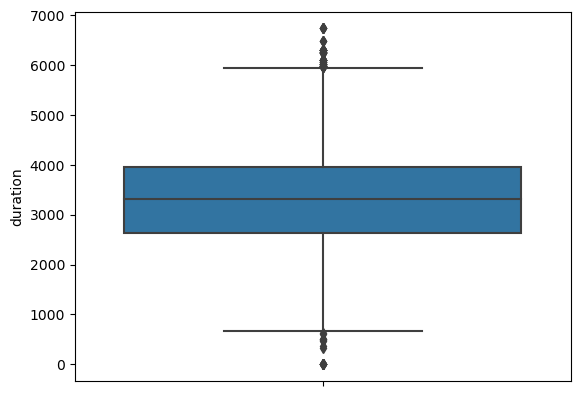

In [75]:
GPS['duration'].nunique()
sns.displot(GPS['duration'])
plt.show()
sns.boxplot(data=GPS,y='duration')
plt.show()

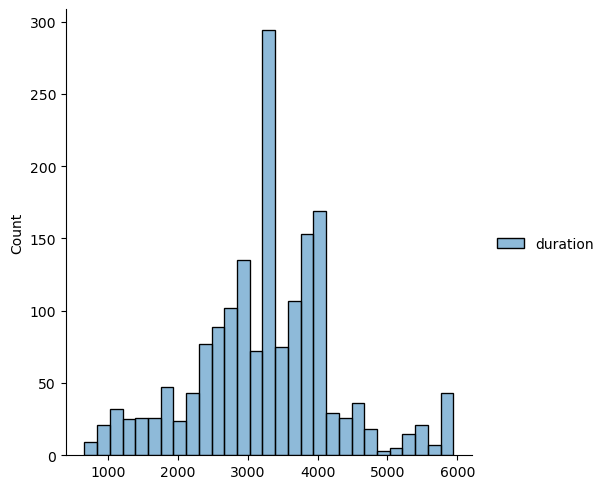

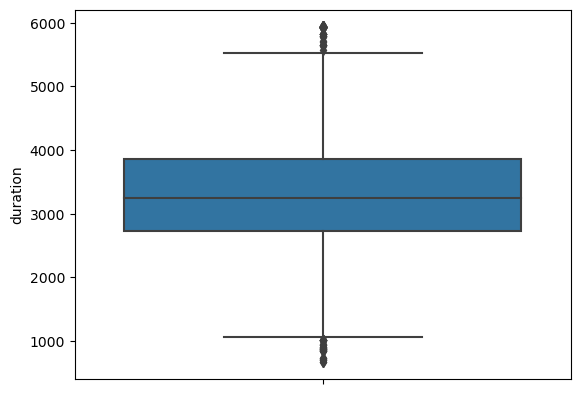

In [76]:
# OUTLIERS

missing_col = ['duration']

for x in missing_col:
    q75,q25 = np.percentile(GPS.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    GPS.loc[GPS[x] < min,x] = np.nan
    GPS.loc[GPS[x] > max,x] = np.nan

for i in missing_col:
    GPS.loc[GPS.loc[:,i].isnull(),i]=GPS.loc[:,i].mean()
    
GPS[missing_col].nunique()
sns.displot(GPS[missing_col])
plt.show()
sns.boxplot(data=GPS,y='duration')
plt.show()

# Heatmap

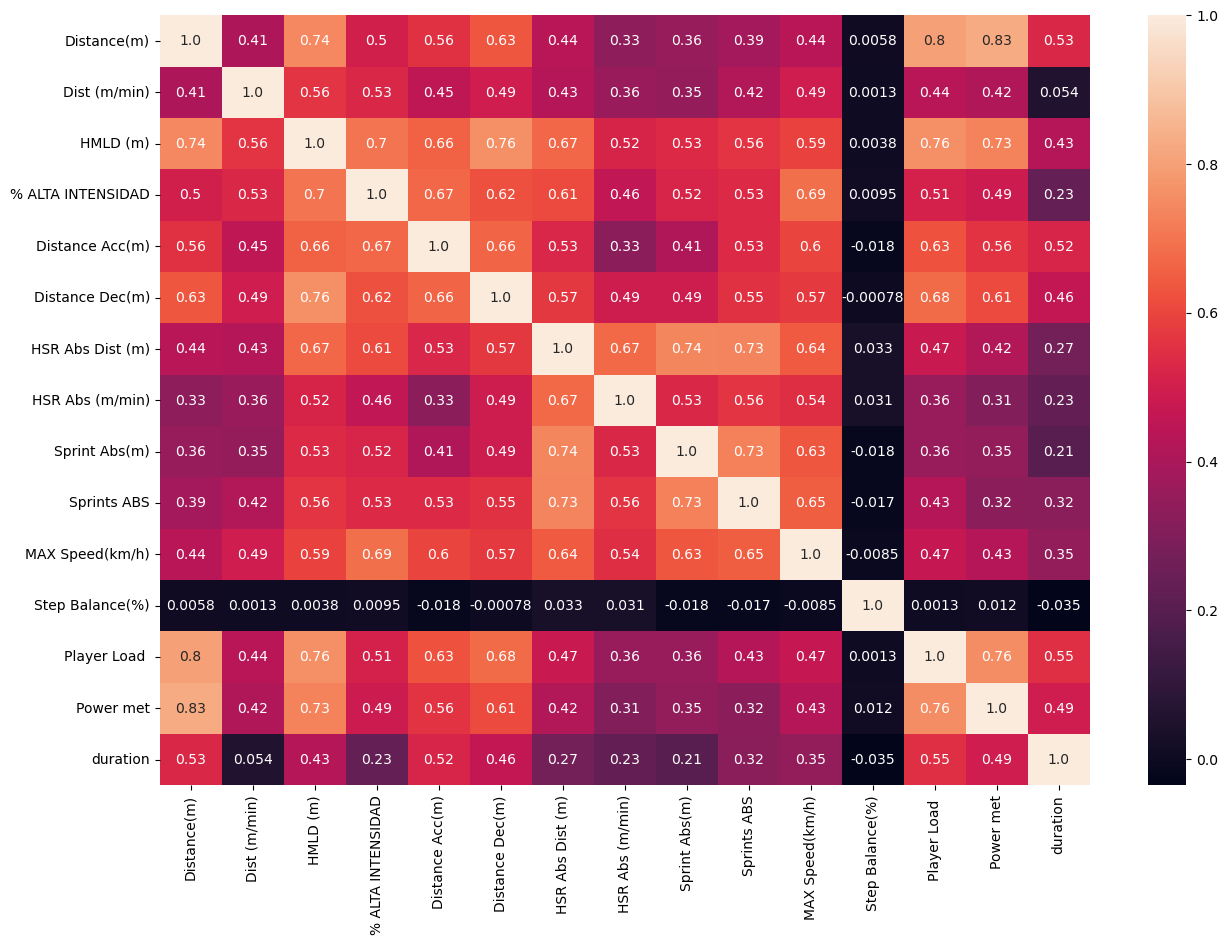

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(GPS.corr(),annot=True,fmt='.2')
plt.show()

In [78]:
GPS = GPS.groupby(['Player', 'Date']).sum().reset_index()
GPS

,Player,Date,Distance(m),Dist (m/min),HMLD (m),% ALTA INTENSIDAD,Distance Acc(m),Distance Dec(m),HSR Abs Dist (m),HSR Abs (m/min),Sprint Abs(m),Sprints ABS,MAX Speed(km/h),Step Balance(%),Player Load,Power met,duration
0,Alan Montes,2021-07-01,3065.043,66.870000,364.629,0.118964,131.400,2.000,270.037,5.892000,0.000,0.0,23.67,-0.0290,50.499675,8326.601,2750.0
1,Alan Montes,2021-07-19,4121.698,58.490000,423.216,0.102680,121.720,90.370,7.783,0.110000,0.000,0.0,21.72,-0.0240,50.499675,11778.178,4228.0
2,Alan Montes,2021-07-21,4711.697,86.980000,633.794,0.134515,286.820,180.040,29.624,0.547000,7.053,1.0,24.44,-0.0180,50.499675,13458.623,3251.0
3,Alan Montes,2021-07-22,4591.800,72.885714,744.438,0.162123,232.490,252.660,251.400,4.217951,134.370,6.0,29.47,0.0030,50.499675,12305.196,3830.0
4,Alan Montes,2021-07-23,2786.076,42.160000,129.510,0.046485,58.470,26.390,9.578,0.145000,0.000,0.0,21.72,0.0220,50.499675,8347.851,3965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,Vincent Janssen,2021-11-05,3003.200,55.614815,292.269,0.097319,109.710,128.094,24.360,3.000000,0.000,0.0,24.24,0.0152,32.320000,7831.130,3251.0
1724,Vincent Janssen,2021-11-06,3210.400,100.325000,509.326,0.158649,113.425,132.812,149.300,7.000000,90.860,5.0,29.72,-0.0262,37.277000,8183.344,1954.0
1725,Vincent Janssen,2021-11-09,3420.500,67.068627,322.021,0.094144,71.016,96.318,17.480,1.000000,0.000,0.0,21.93,0.0009,40.028000,8757.836,3089.0
1726,Vincent Janssen,2021-11-10,3891.700,63.798361,380.567,0.097789,183.819,160.301,10.040,1.000000,0.000,0.0,22.12,-0.0179,44.968000,10090.409,3660.0


In [80]:
# Saving the data
GPS.to_excel('GPS_clean.xlsx')